# Problem statement:
This dataset has total 28 columns and 21643 rows. Our task is to analyze the dataset and predict the expected Final Mandet  by developing a Regression model.

In [36]:
#import all required liabrary 
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import RFE

In [37]:
df = pd.read_csv('ElectionData.csv')
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.

In [38]:
df.shape

(21643, 28)

In [39]:
df.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [40]:
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [41]:
df.corr()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,0.260377,-0.261627,-0.001944,0.100432,0.192350,0.034343,0.185784,-0.225021,0.029698,...,-0.106054,0.054761,0.193160,0.196667,0.090190,0.000767,0.000526,0.082417,-0.001100,-0.001007
totalMandates,0.260377,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,0.171317,...,-0.132143,0.151927,0.972976,0.975404,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117
availableMandates,-0.261627,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,0.112293,...,-0.044174,0.080524,0.391272,0.383089,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764
numParishes,-0.001944,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,0.073855,...,-0.058017,0.026407,0.860782,0.853779,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009
numParishesApproved,0.100432,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,0.081157,...,-0.073301,0.042180,0.949110,0.943147,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177
blankVotes,0.192350,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,0.183970,...,-0.150275,0.161642,0.998487,0.998178,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583
blankVotesPercentage,0.034343,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,-0.190778,...,-0.307544,-0.105314,0.002821,-0.000069,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195
nullVotes,0.185784,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,0.181411,...,-0.125639,0.154965,0.999296,0.998706,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663
nullVotesPercentage,-0.225021,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,-0.108855,...,0.497749,-0.233688,-0.153891,-0.159566,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659
votersPercentage,0.029698,0.171317,0.112293,0.073855,0.081157,0.183970,-0.190778,0.181411,-0.108855,1.000000,...,-0.278275,0.909825,0.172542,0.186834,0.056553,-0.019836,-0.020966,0.076377,0.066665,0.061048


# Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in object column is Categorical data. we need to convert these into numerical notations. Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [42]:
df.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [43]:
df.drop(['TimeElapsed','time'],axis=1,inplace=True)

In [44]:
df.head()

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [45]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

territoryName : ['Território Nacional' 'Aveiro' 'Beja' 'Braga' 'Bragança' 'Castelo Branco'
 'Coimbra' 'Évora' 'Faro' 'Guarda' 'Leiria' 'Lisboa' 'Madeira'
 'Portalegre' 'Porto' 'Santarém' 'Setúbal' 'Viana do Castelo' 'Vila Real'
 'Viseu' 'Açores']
totalMandates : [  0  12   3   2   1  14   4  16  22  27   5   6  36   7  37  51   9  61
  10  64  68  82  11   8  87  15  96 110  13  18 125  19 129 132  20 144
  17 149 163  26 173  25  28 176 178  30 184 185 188  31  35  32 197 201
  39  40 209 210 211 217  48 226]
availableMandates : [226  16   3  19   4   9  10  48   6   2  40  18   5   8 214  38 212  15
 210 204 199  14  37  13  36 190   0  12  35   7 189  47  34 175  33  17
 165  46 162  31 158  45  30  28 144  44  26 139  11  43  25 130  24 116
  41  22 101  21  97  94  20  82  77  29  63  53  23  50  42]
numParishes : [3092  147   75  347  226  120  155   69   67  242  110  134   54  243
  141   55  208  197  277  156]
numParishesApproved : [1081   12   23   61   96   73   32   21   1

In [46]:
categorical_val

[]

In [47]:
df['territoryName'].unique()

array(['Território Nacional', 'Aveiro', 'Beja', 'Braga', 'Bragança',
       'Castelo Branco', 'Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria',
       'Lisboa', 'Madeira', 'Portalegre', 'Porto', 'Santarém', 'Setúbal',
       'Viana do Castelo', 'Vila Real', 'Viseu', 'Açores'], dtype=object)

In [48]:
from sklearn import preprocessing

lb = preprocessing.LabelEncoder()

df['territoryName'] = lb.fit_transform(df['territoryName'])
df['Party'] = lb.fit_transform(df['Party'])    


In [49]:
df['territoryName'].unique()

array([16,  0,  2,  3,  4,  5,  6, 20,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       17, 18, 19,  1])

In [50]:
df.head()

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,17,0,38.29,40.22,147993,94,106
1,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,15,0,33.28,34.95,128624,81,77
2,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,1,0,6.81,7.15,26307,16,19
3,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,2,0,4.90,5.14,18923,12,5
4,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,11,0,4.59,4.83,17757,11,12


# Data Visualization:
Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

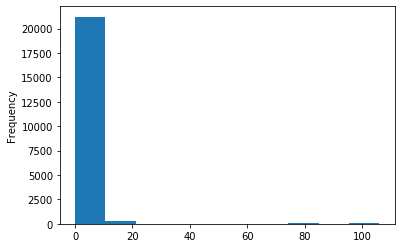

In [51]:
#Check skewness of data set
df['FinalMandates'].plot.hist()

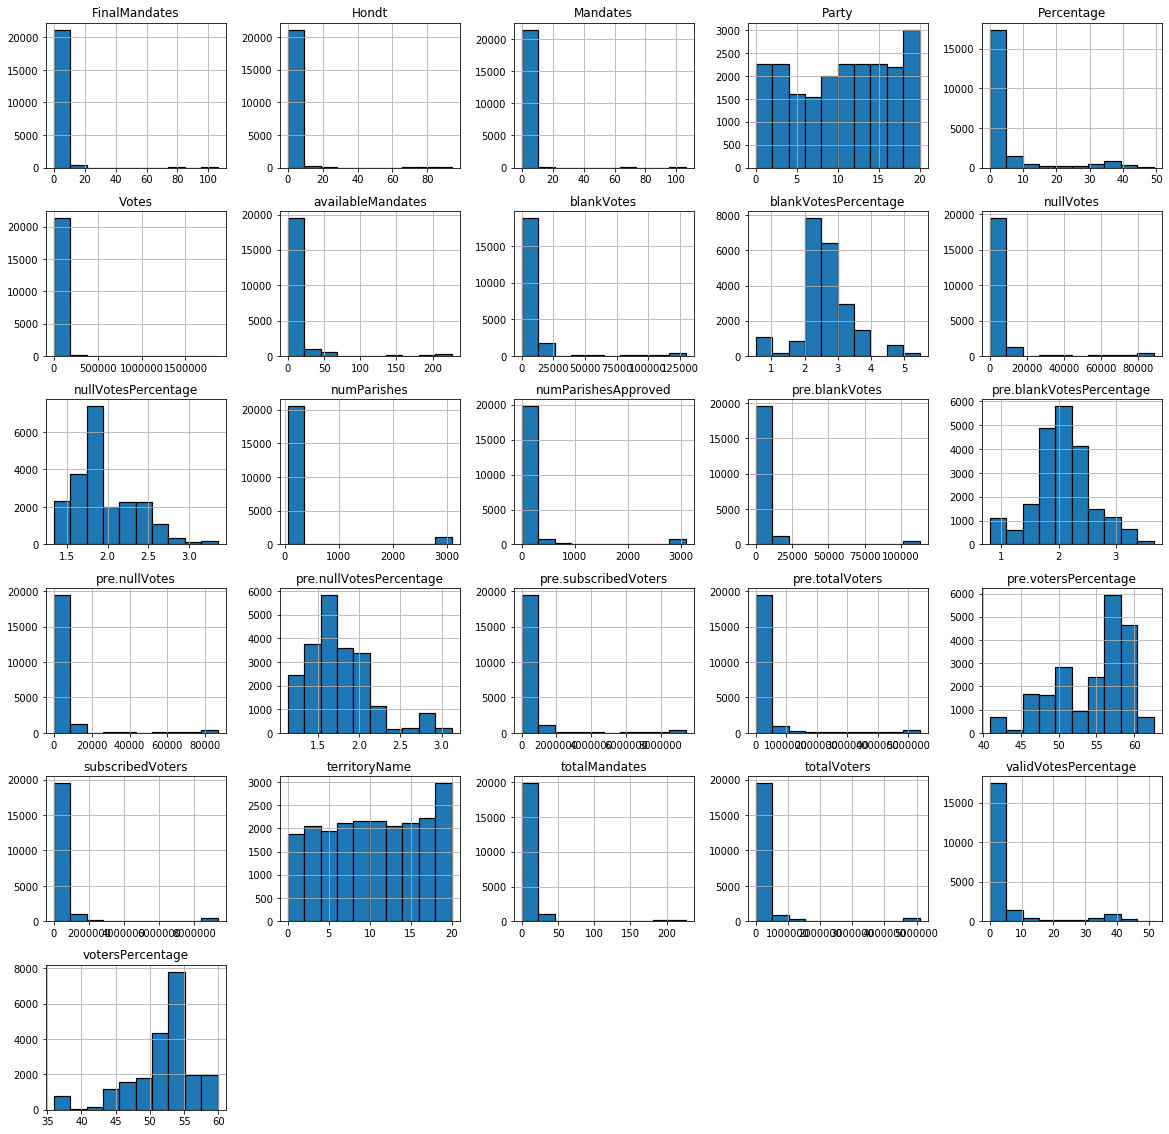

In [52]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

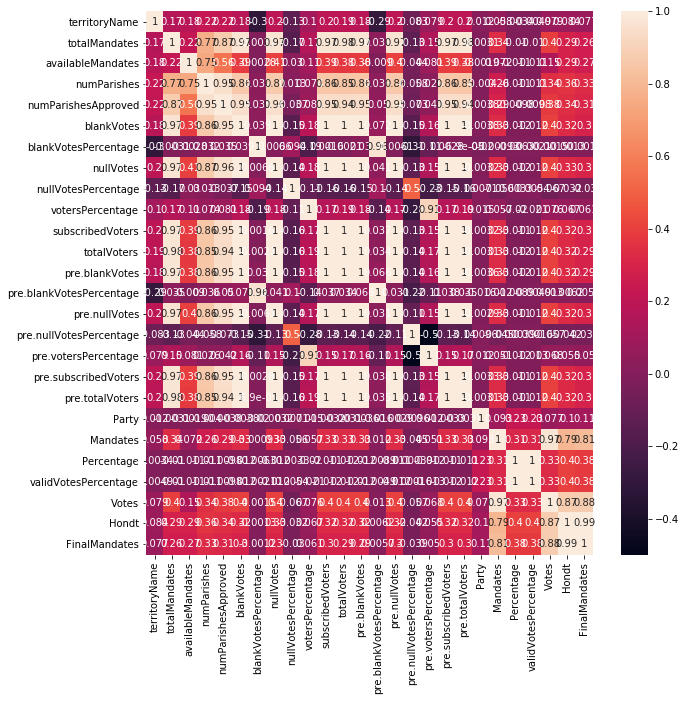

In [53]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot = True)

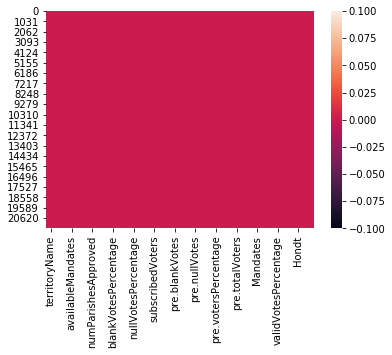

In [54]:
sns.heatmap(df.isnull())

In [55]:
df.describe()

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,10.116851,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,54.549372,6.378503e+05,3.594932e+05,10.096521,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,5.985225,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,4.964948,1.544418e+06,8.763729e+05,6.129654,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,40.870000,6.383000e+03,3.215000e+03,0.000000,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,5.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,51.210000,1.289260e+05,6.964400e+04,4.000000,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,10.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,56.260000,2.284970e+05,1.102730e+05,11.000000,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,15.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,58.220000,3.933140e+05,2.276200e+05,15.000000,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,20.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,62.580000,9.439701e+06,5.380451e+06,20.000000,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


# Model Selection for max Temp:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the mandet which can be increase exponetially. This scenario is a classic example of Regressions.

We are provided with 21643 rows of the labeled dataset tagged with the output column “FinalMandates” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Linear problem. Based on these criteria we can narrow down our choice of models to a few:

LinearRegression()

DecisionTreeRegressor()

RandomForestRegressor()

# Identifying features:
Here we are dividing our data into a dependent feature that is object as y and independent features as x.

In [56]:
y = df['FinalMandates']
y.shape

(21643,)

In [57]:
x = df.drop(['FinalMandates'],axis=1)
x.shape

(21643, 25)

# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.15 creates a test data set with 15% of the data we have and the remaining 85% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .15 , random_state = 44)

In [59]:
model = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('error')
    print('mae',mean_absolute_error(y_test,predm))
    print('mse',mean_squared_error(y_test,predm))
    print('rmse',np.sqrt(mean_squared_error(y_test,predm)))
    print('score',r2_score(y_test,predm))
    print('\n')

error
mae 0.18517969454074484
mse 0.3436822793393396
rmse 0.5862442147598044
score 0.993903373457741


error
mae 0.0018478595626732369
mse 0.0018478595626732369
rmse 0.04298673705543649
score 0.9999672205687247


error
mae 0.0020418848167539274
mse 0.0005935632891900216
rmse 0.024363154335800233
score 0.9999894707003505




# we can observe that Decision Tree Regressor algorithem worked very well.
Accuracy score of both algorithems are as given:-

Accuracy score of Linear Regression is 99%

Accuracy score of DecisionTreeRegressor() is 99%

Accuracy score of RandomForestRegressor() is 99%

Hence we can say that out all algorithems Decision Tree Regressor is best for this problem till now however we will use cross validation to select best model.

In [60]:
lm =DecisionTreeRegressor()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)
pred= lm.predict(x_test)
print("predicted value",pred)
print("actual value",y_test)
print('error')
print('mae',mean_absolute_error(y_test,pred))
print('mse',mean_squared_error(y_test,pred))
print('rmse',np.sqrt(mean_squared_error(y_test,pred)))
print('score',r2_score(y_test,predm))

predicted value [0. 0. 0. ... 0. 0. 0.]
actual value 13189    0
2347     0
9222     0
4165     0
231      0
        ..
13132    0
13730    0
16506    0
13361    0
15377    0
Name: FinalMandates, Length: 3247, dtype: int64
error
mae 0.0018478595626732369
mse 0.0018478595626732369
rmse 0.04298673705543649
score 0.9999894707003505


# Model Validation

In [62]:
clf = DecisionTreeRegressor()

scores = cross_val_score(clf,x,y,cv=5,scoring='r2')
scores.mean()

0.9044920394246814

# Save the model using Pickle

In [66]:
# Save the model using pickle
import pickle

filename = "pickleDTCfile.pkl"
pickle.dump(clf, open(filename, 'wb'))


# Conclusion

we achieved highest accuracy score of 90% by using DecisionTreeRegressor() which is good for any machine learning prediction model particularly for a linear regression problem. Finally! we successfully created a Regression Machine Learning prediction model using Python and its powerful libraries which predicts the final mandets.